In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve

In [4]:
def func(xvec, *const):
    
    #xvec = (theta1, theta2, theta3)
    
    a,b,x,y,beta  = const
    
    c      = np.sqrt(x**2 + y**2)    
    alpha2 = np.arcsin(y/c)
    
    f = np.zeros(3)
    
    f[0] = a**2 + b**2 - 2*a*b*np.cos(xvec[1]) - c**2    
    f[1] = a**2 + c**2 - 2*a*c*np.cos(xvec[0] - alpha2) - b**2
    f[2] = xvec[0] + xvec[1]- xvec[2] - beta
    
    return f

In [8]:
# Define desired position for the robotic hand
x = 10
y = 2
beta = np.pi/6
# Given arm lengths:
a = 15
b = 5
# Create tuple with optional problem parameters
const = (a,b,x,y,beta)

# Set initial guess

c = np.sqrt(x**2+y**2)
theta1guess = np.pi/2
theta2guess = np.arccos( (a**2+b**2-c**2)/(2*a*b) )
theta3guess = theta1guess+theta2guess
xguess = [theta1guess,theta2guess,theta3guess]

# Solve for the unknowns 
# sol = [theta1, theta2, theta3]
sol = fsolve(func, xguess, args=const)
print(sol)

[ 0.31010436  0.23145641  0.01796199]


## Plot the "arms" and "hand" as a function of the given values x,y,beta

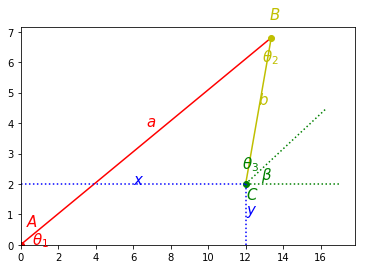

In [6]:
def endpt(pt, ang, length):
    x, y = pt
    endy = y + length * np.sin(ang)
    endx = x + length * np.cos(ang)
    return endx, endy

startx, starty = (0,0)
endx, endy = endpt((startx,starty),sol[0],a)
plt.plot([startx, endx], [starty, endy], '-r')
plt.plot([startx], [starty], 'ro')
plt.text(startx+0.3, starty+0.6, r'$A$', fontsize=15, color='r')
plt.text((startx+endx)/2, (starty+endy)/2+0.5, r'$a$', fontsize=15, color='r')
plt.text(startx+0.6, starty, r'$\theta_1$', fontsize=15, color='r')
startx, starty = (endx,endy)
endx, endy = endpt((startx,starty),sol[0]+sol[1]-np.pi,b)
plt.plot([startx, endx], [starty, endy], '-y')
plt.plot([startx], [starty], 'yo')
plt.text(startx-0.1, starty+0.6, r'$B$', fontsize=15, color='y')
plt.text((startx+endx)/2, (starty+endy)/2+0.2, r'$b$', fontsize=15, color='y')
plt.text(startx-0.5, starty-0.8, r'$\theta_2$', fontsize=15, color='y')
startx, starty = (endx,endy)
endx, endy = endpt((startx,starty),sol[0]+sol[1]-sol[2],5)
plt.plot([startx, endx], [starty, endy], ':g')
plt.plot([startx, startx+5], [starty, starty], ':g')
plt.plot([startx], [starty], 'go')
plt.text(startx+0.8, starty+0.15, r'$\beta$', fontsize=15, color='g')
plt.text(startx, starty-0.5, r'$C$', fontsize=15, color='g')
plt.plot([startx, startx], [0, starty], ':b')
plt.text(startx, starty/2, r'$y$', fontsize=15, color='b')
plt.plot([0, startx], [starty, starty], ':b')
plt.text(startx/2, starty, r'$x$', fontsize=15, color='b')
plt.text(startx-0.2, starty+0.5, r'$\theta_3$', fontsize=15, color='g')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()